<a href="https://colab.research.google.com/github/marco11235813/s15-33-ft-data-bi-/blob/jorge/Desarrollo_del_modelo(ETL_EDA__y_entrenamiento).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/marco11235813/s15-33-ft-data-bi-.git

# Proceso ETL de datos.

 ***Esta base de datos surge como consecuencia de un arduo análisis de nueve bases de datos relacionales que contenían información sobre rendimiento deportivo futbolístico, obtenidas desde Kaggle. En la cual se juntan  las variables que se consideran más importantes a la hora de predecir si un equipo de fútbol puede ganar, perder o empatar un partido.***

In [1]:
# Se inicia drive en caso de que estés usando google colab.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import polars as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
# Leo el dataframe con la funcion .read_csv de polars

df = pl.read_csv("/content/drive/MyDrive/Classroom/BD_No_Country/df_merged.csv")

In [4]:
# Obtengo las filas y columnas del DataFrame para tener
# una idea de las dimensiones
num_filas = df.height

# Obtener el número de columnas
num_columnas = df.width

print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")

Número de filas: 583257
Número de columnas: 18


In [5]:
# Ver las primeras 4 filas del DataFrame
print("Vista previa de las primeras 5 filas:")
df.head(4)



Vista previa de las primeras 5 filas:


game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,competition_type,club_id,own_goals,own_position,opponent_id,opponent_goals,opponent_position,result,age,average_height
i64,str,i64,i64,i64,i64,f64,f64,str,i64,i64,f64,i64,i64,f64,i64,f64,f64
2321044,"""2013-08-18""",16,23,2,1,1.0,15.0,"""domestic_leagu…",16,2,1.0,23,1,15.0,2,42.819302,182.254099
2321044,"""2013-08-18""",16,23,2,1,1.0,15.0,"""domestic_leagu…",16,2,1.0,23,1,15.0,2,44.298426,182.254099
2321044,"""2013-08-18""",16,23,2,1,1.0,15.0,"""domestic_leagu…",16,2,1.0,23,1,15.0,2,43.715264,182.254099
2321044,"""2013-08-18""",16,23,2,1,1.0,15.0,"""domestic_leagu…",16,2,1.0,23,1,15.0,2,40.778234,182.254099


***A continuación te explico qué representa cada columna en el dataframe:***

***game_id:*** Identificador único del partido. Este valor es compartido por todas las filas que describen el mismo partido.

***date:*** Fecha en que se jugó el partido. Está en formato de cadena de texto.

***home_club_id:*** Identificador único del club que jugó como local en el partido.

***away_club_id:*** Identificador único del club que jugó como visitante en el partido.

***home_club_goals:*** Número de goles anotados por el equipo local.

***away_club_goals:*** Número de goles anotados por el equipo visitante.

***home_club_position:*** Posición del equipo local en la tabla de la liga (o competencia) en el momento del partido.

***away_club_position:*** Posición del equipo visitante en la tabla de la liga (o competencia) en el momento del partido.

***competition_type:*** Tipo de competencia en la que se jugó el partido (por ejemplo, liga doméstica, copa, etc.).

***club_id:*** Identificador del club para el que se registran las estadísticas en esa fila (puede ser el club local o el visitante).

***own_goals:*** Número de goles anotados por el club identificado en la columna club_id.

***own_position:*** Posición en la tabla de la liga (o competencia) del club identificado en la columna club_id en el momento del partido.


***opponent_id:*** Identificador del club oponente del partido para el club identificado en la columna club_id.

***opponent_goals:*** Número de goles anotados por el equipo oponente.

***opponent_position:*** Posición en la tabla de la liga (o competencia) del equipo oponente en el momento del partido.

***result:*** Resultado del partido para el club identificado en la columna club_id. Comúnmente, podría ser representado como una victoria (1), empate (0), o derrota (-1).

***age:*** Edad promedio de los jugadores del club identificado en la columna club_id en el momento del partido.

***average_height:*** Altura promedio de los jugadores del club identificado en la columna club_id en el momento del partido.

***Estas columnas permiten analizar diversos aspectos de cada partido, incluyendo rendimiento de los equipos, impacto de la edad y altura promedio en los resultados, y comparación entre equipos locales y visitantes.***

In [6]:
# Elimino las columnas 'club_id', 'own_goals', 'own_position',
# 'opponent_id', 'opponent_goals', 'opponent_position', 'average_height porque es informacion repetida.
columns_to_drop = ['game_id','club_id', 'own_goals', 'own_position', 'opponent_id', 'opponent_goals',
                   'opponent_position', 'average_height']

# Elimina las columnas especificadas
df = df.drop(columns=columns_to_drop)

In [7]:
# Calcular la cantidad de valores nulos por columna
valores_nulos_por_columna = df.null_count()

# Convertir el resultado a un diccionario para una mejor visualización
valores_nulos_dict = {col: valores_nulos_por_columna[col][0] for col in valores_nulos_por_columna.columns}

# Mostrar la cantidad de valores nulos por columna
print("Cantidad de valores nulos por columna:")
for col, nulos in valores_nulos_dict.items():
    print(f"{col}: {nulos}")

Cantidad de valores nulos por columna:
date: 1
home_club_id: 1
away_club_id: 1
home_club_goals: 1
away_club_goals: 1
home_club_position: 75877
away_club_position: 75877
competition_type: 1
result: 1
age: 1850


In [8]:
# Lista de columnas en las que se desea verificar y eliminar filas con valores nulos
columnas = [
    "date", "home_club_goals", "away_club_goals",
    "competition_type",
    "result", "age","home_club_position","away_club_position", "competition_type","result"]

# Eliminar filas que contienen valores nulos en las columnas especificadas
df = df.drop_nulls(subset=columnas)

In [9]:
# Calcular la cantidad de valores nulos por columna
valores_nulos_por_columna = df.null_count()

# Convertir el resultado a un diccionario para una mejor visualización
valores_nulos_dict = {col: valores_nulos_por_columna[col][0] for col in valores_nulos_por_columna.columns}

# Mostrar la cantidad de valores nulos por columna
print("Cantidad de valores nulos por columna:")
for col, nulos in valores_nulos_dict.items():
    print(f"{col}: {nulos}")

Cantidad de valores nulos por columna:
date: 0
home_club_id: 0
away_club_id: 0
home_club_goals: 0
away_club_goals: 0
home_club_position: 0
away_club_position: 0
competition_type: 0
result: 0
age: 0


In [10]:
# Obtengo las filas y columna del DataFram para ver las dimensiones
# luego de eliminar las variables sin importancia para el modelo.
# Vemos quedó una base de datos con 506.750 filas
# y 11 columnas.
num_filas = df.height

# Obtener el número de columnas
num_columnas = df.width

print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")

Número de filas: 506750
Número de columnas: 10


In [11]:
# Visualizo las categorías que quedaron en "competition_type"
# para ver sobre que tipo de competición quedo información.
# Se puede observar que solo quedo informacion sobre la "domestic_league".
valores_unicos = df["competition_type"].unique()
valores_unicos.to_list()

['domestic_league']

***Vemos que todas las columnas del dataframe son numéricas a excepción de la variable "competition_type".*** ***Desde ahora en adelante se inicia el proceso EDA de los datos.***

# Proceso EDA de la base de datos.

In [12]:
# Convirtiendo el DataFrame de Polars a Pandas
df_pandas = df.to_pandas()

In [13]:
# Convertir la columna categorica "competition_type" en números
df_pandas['competition_type'] = df_pandas['competition_type'].astype('category').cat.codes


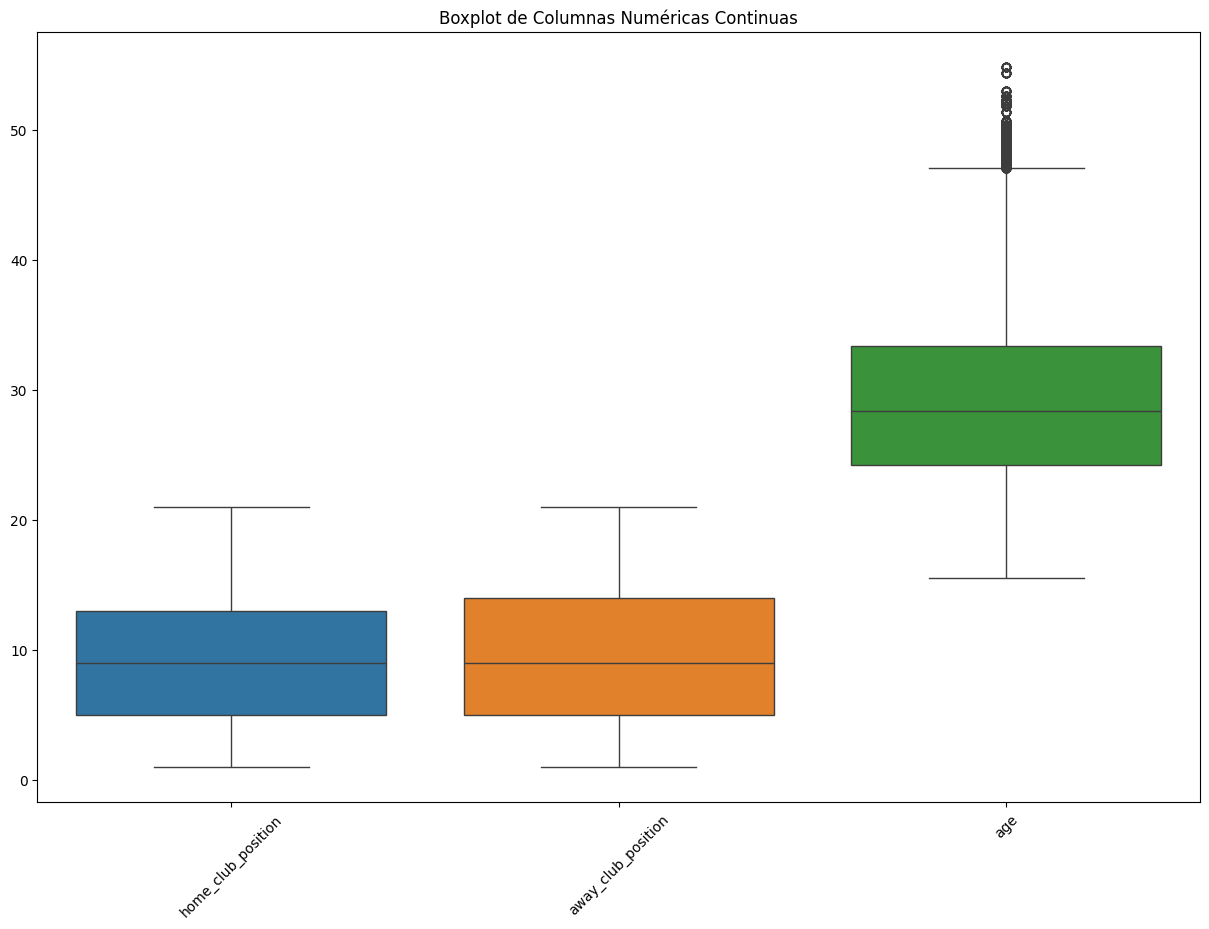

In [14]:
# Filtrar solo las columnas numéricas continuas
numerical_columns = df_pandas.select_dtypes(include=['float64']).columns

# Crear un boxplot para cada columna numérica continua
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_pandas[numerical_columns])
plt.xticks(rotation=45)
plt.title('Boxplot de Columnas Numéricas Continuas')
plt.show()

In [15]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_pandas['age'].quantile(0.25)
Q3 = df_pandas['age'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar los valores atípicos
df_pandas = df_pandas[(df_pandas['age'] >= lower_bound) & (df_pandas['age'] <= upper_bound)]

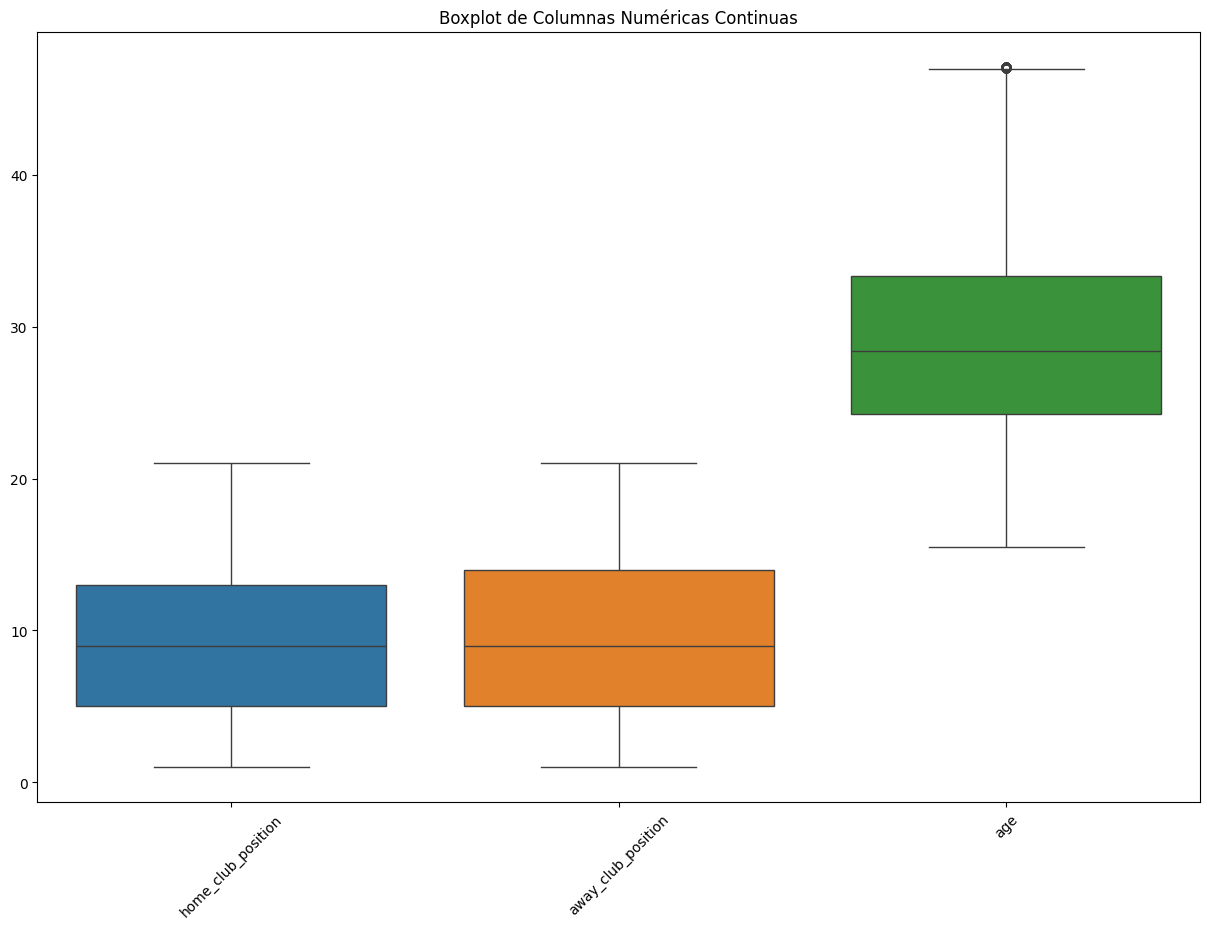

In [16]:
# Filtrar solo las columnas numéricas continuas
numerical_columns = df_pandas.select_dtypes(include=['float64']).columns

# Crear un boxplot para cada columna numérica continua
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_pandas[numerical_columns])
plt.xticks(rotation=45)
plt.title('Boxplot de Columnas Numéricas Continuas')
plt.show()

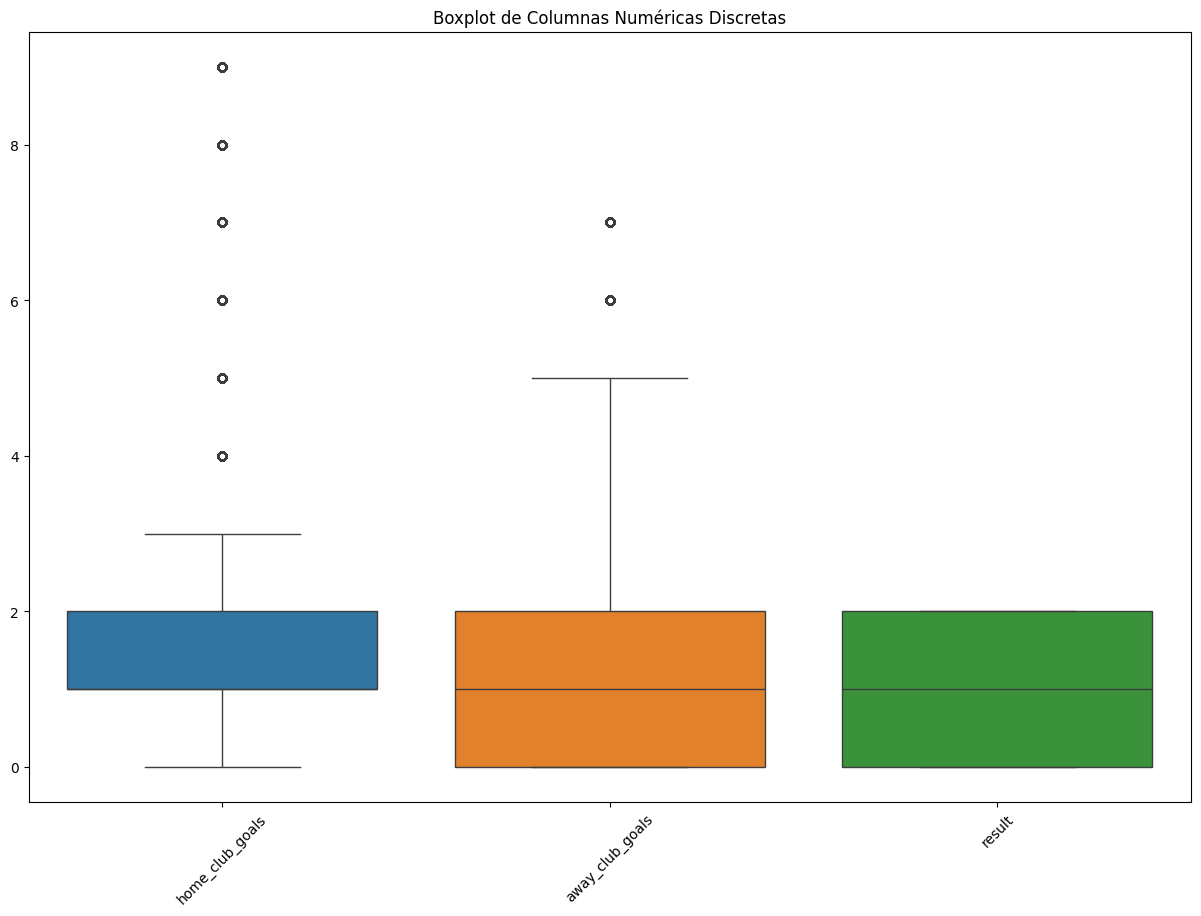

In [17]:
# Identificar las columnas numéricas discretas (tipo int64)
discrete_columns = df_pandas.select_dtypes(include=['int64']).columns

# Excluir columnas que no sean relevantes (identificadores únicos)
# Suponiendo que las columnas de identificadores únicos no son relevantes para el análisis de valores atípicos
columns_to_exclude = ['game_id', 'home_club_id', 'away_club_id', 'club_id', 'opponent_id']
discrete_columns = [col for col in discrete_columns if col not in columns_to_exclude]

# Crear un boxplot para cada columna numérica discreta
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_pandas[discrete_columns])
plt.xticks(rotation=45)
plt.title('Boxplot de Columnas Numéricas Discretas')
plt.show()

In [18]:
# Lista de las columnas a evaluar
columns_to_check = ['home_club_goals', 'away_club_goals']

for column in columns_to_check:
    # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para la columna actual
    Q1 = df_pandas[column].quantile(0.25)
    Q3 = df_pandas[column].quantile(0.75)

    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Definir los límites para identificar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar el DataFrame para eliminar los valores atípicos en la columna actual
    df_pandas = df_pandas[(df_pandas[column] >= lower_bound) & (df_pandas[column] <= upper_bound)]

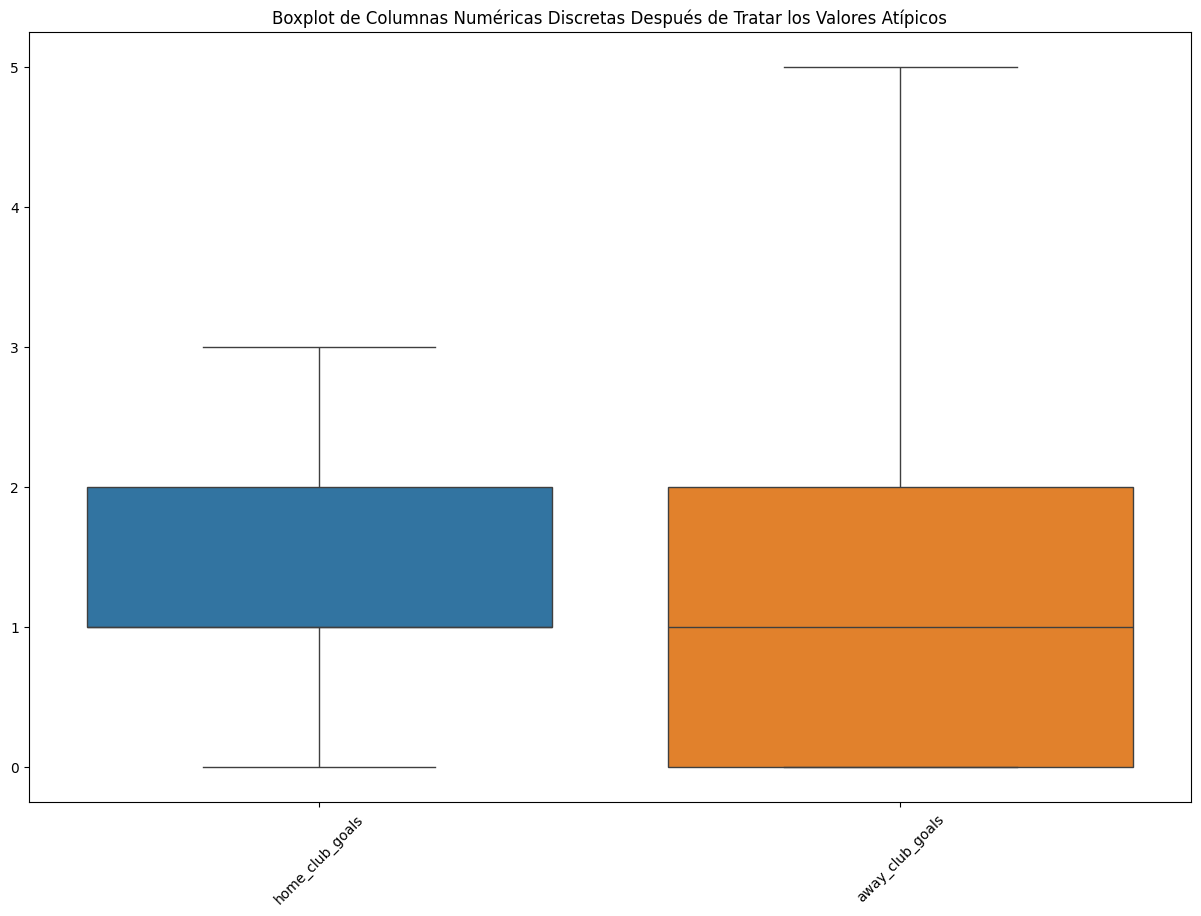

In [19]:
# Crear un boxplot para las columnas donde se trataron los valores atípicos
columns_with_outliers = ['home_club_goals', 'away_club_goals']

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_pandas[columns_with_outliers])
plt.xticks(rotation=45)
plt.title('Boxplot de Columnas Numéricas Discretas Después de Tratar los Valores Atípicos')
plt.show()

In [20]:
# Suponiendo que tu DataFrame original se llama df_pandas
columns_to_standardize = ['home_club_goals', 'away_club_goals', 'home_club_position', 'away_club_position', 'age']

scaler = StandardScaler()
df_pandas[columns_to_standardize] = scaler.fit_transform(df_pandas[columns_to_standardize])

# Verificar si hay valores nulos después de la estandarización
print(df_pandas.isnull().sum())

date                  0
home_club_id          0
away_club_id          0
home_club_goals       0
away_club_goals       0
home_club_position    0
away_club_position    0
competition_type      0
result                0
age                   0
dtype: int64


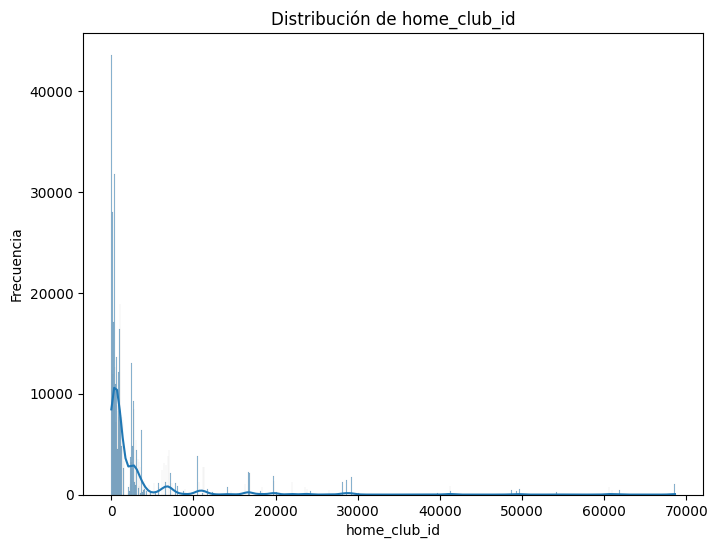

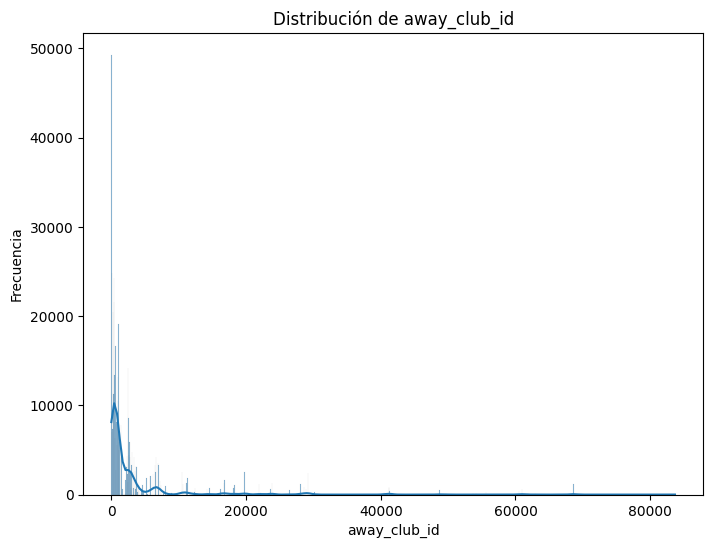

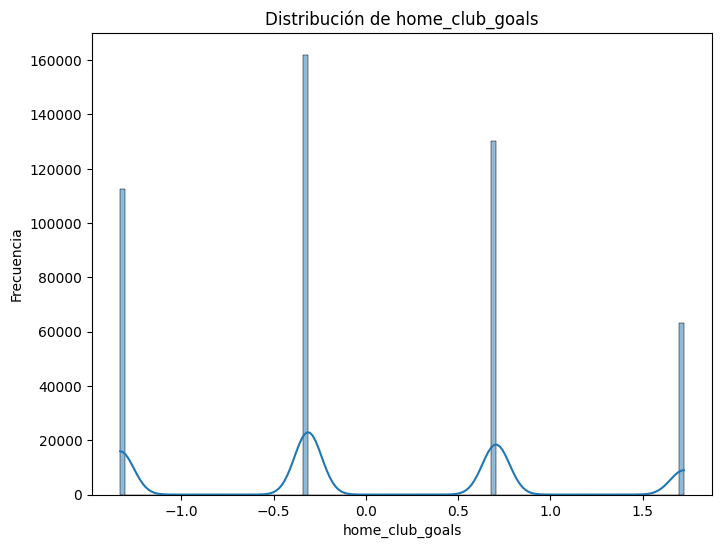

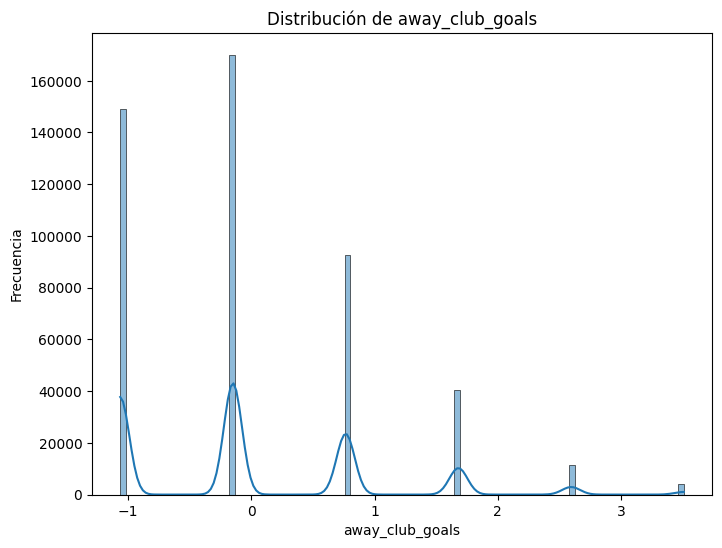

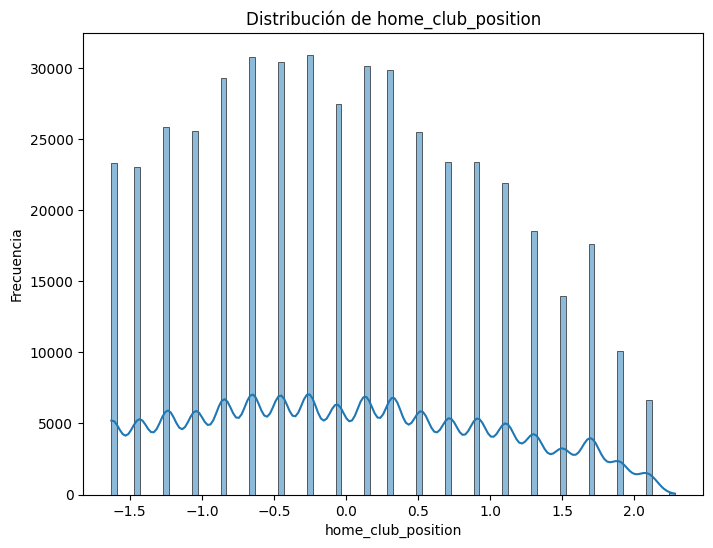

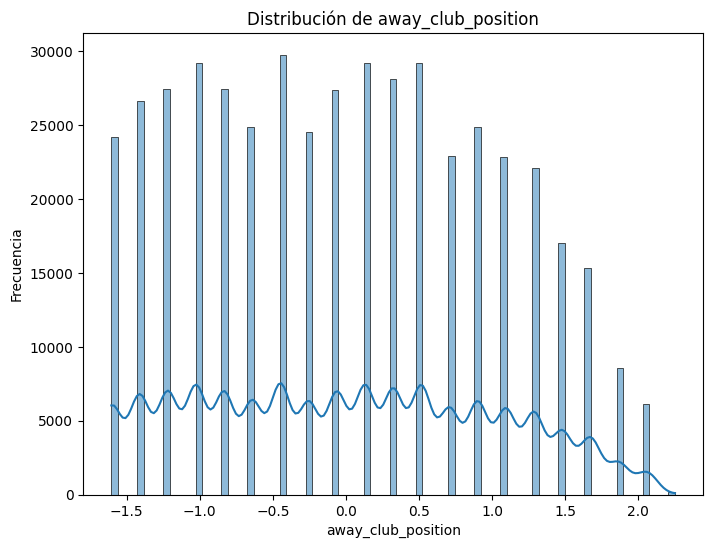

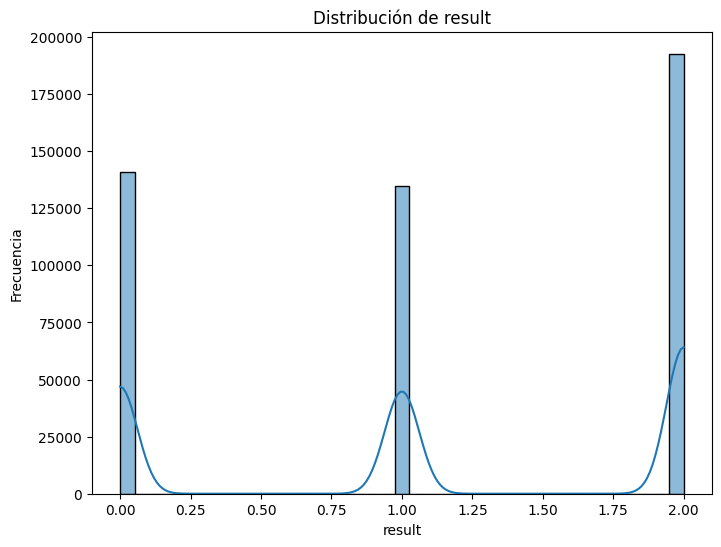

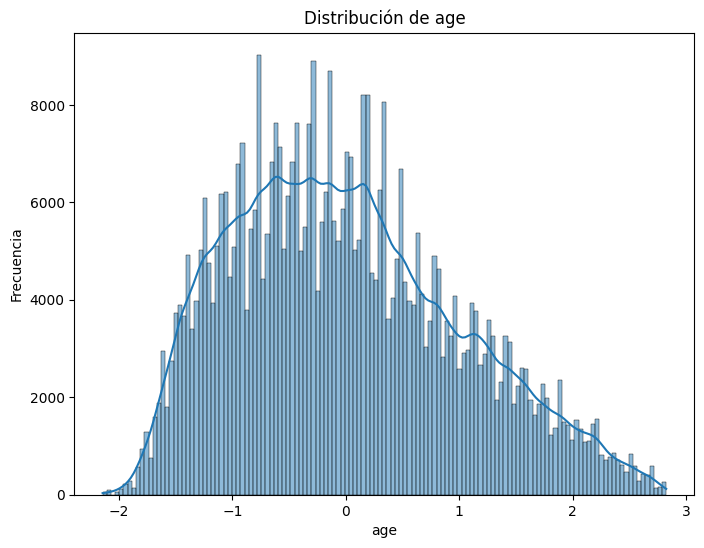

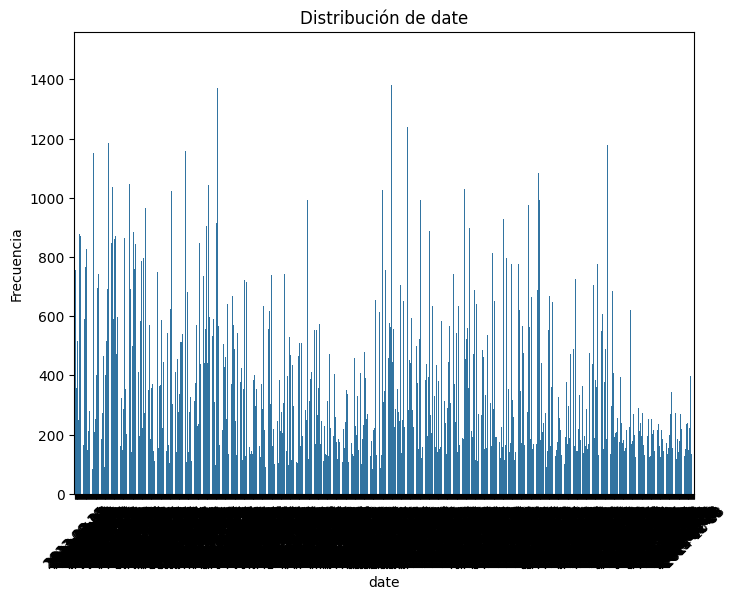

In [21]:
# Obtener las columnas numéricas y categóricas
numeric_columns = df_pandas.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_pandas.select_dtypes(include=['object']).columns

# Visualización de variables numéricas
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_pandas[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Visualización de variables categóricas
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_pandas)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

***La base de datos está lista para pasar a la fase de entrenamiento del modelo.***

# Se inicializa el proceso de entrenamiento del modelo.

In [ ]:
df_pandas

,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,competition_type,result,age
0,2013-08-18,16,23,0.705355,-0.147690,-1.628333,1.094586,0,2,2.153512
1,2013-08-18,16,23,0.705355,-0.147690,-1.628333,1.094586,0,2,2.386391
2,2013-08-18,16,23,0.705355,-0.147690,-1.628333,1.094586,0,2,2.294576
3,2013-08-18,16,23,0.705355,-0.147690,-1.628333,1.094586,0,2,1.832159
4,2013-08-18,16,23,0.705355,-0.147690,-1.628333,1.094586,0,2,2.271730
...,...,...,...,...,...,...,...,...,...,...
506745,2015-01-17,2759,465,-0.312951,0.766214,0.522998,0.323253,0,0,-0.736512
506746,2015-01-17,2759,465,-0.312951,0.766214,0.522998,0.323253,0,0,-0.454062
506747,2015-01-17,2759,465,-0.312951,0.766214,0.522998,0.323253,0,0,-0.584672
506748,2015-01-17,2759,465,-0.312951,0.766214,0.522998,0.323253,0,0,-0.510099


***A continuación te explico qué representa cada columna en el dataframe final para el entrenamiento:***

***date:*** Fecha en que se jugó el partido. Está en formato de cadena de texto.

***home_club_goals:*** Número de goles anotados por el equipo local.

***away_club_goals:*** Número de goles anotados por el equipo visitante.

***home_club_position:*** Posición del equipo local en la tabla de la liga (o competencia) en el momento del partido.

***away_club_position:*** Posición del equipo visitante en la tabla de la liga (o competencia) en el momento del partido.

***competition_type:*** Tipo de competencia en la que se jugó el partido (por ejemplo, liga doméstica, copa, etc.).

***result:*** Resultado del partido para el club identificado en la columna club_id. Comúnmente, podría ser representado como una victoria (1), empate (0), o derrota (-1).

***age:*** Edad promedio de los jugadores del club identificado en la columna club_id en el momento del partido.

***Estas columnas permiten analizar diversos aspectos de cada partido, incluyendo rendimiento de los equipos, impacto de la edad y altura promedio en los resultados, y comparación entre equipos locales y visitantes.***

In [ ]:
# Convertir la columna "date" a tipo datetime si no lo está
df_pandas['date'] = pd.to_datetime(df_pandas['date'])

# Obtener el valor mínimo y máximo de la columna "date"
min_date = df_pandas['date'].min()
max_date = df_pandas['date'].max()

print("Fecha mínima:", min_date)
print("Fecha máxima:", max_date)

Fecha mínima: 2012-07-14 00:00:00
Fecha máxima: 2024-05-12 00:00:00


In [ ]:
# Extraer solo la parte de la fecha y convertirla a string
df_pandas['date'] = df_pandas['date'].dt.strftime('%Y-%m-%d')

In [ ]:
df_pandas["date"].unique()

array(['2013-08-18', '2013-08-25', '2013-09-21', ..., '2015-01-14',
       '2015-02-05', '2014-10-03'], dtype=object)

***Modelo entrenado con "RandomForestClassifier".***

In [32]:
# Dividir los datos en entrenamiento y prueba según la fecha
train_data = df_pandas[df_pandas['date'] < '2019-01-01']
test_data = df_pandas[df_pandas['date'] >= '2019-01-01']

# Separar características y variable objetivo
X_train = train_data.drop(['date', 'result'], axis=1)
y_train = train_data['result']
X_test = test_data.drop(['date', 'result'], axis=1)
y_test = test_data['result']

# Entrenar el modelo
model = RandomForestClassifier(n_estimators=8, random_state=30)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9873066324373608
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     58700
           1       0.98      0.98      0.98     54554
           2       1.00      0.99      0.99     83069

    accuracy                           0.99    196323
   macro avg       0.99      0.99      0.99    196323
weighted avg       0.99      0.99      0.99    196323



***Modelo entrenado con "LogisticRegression".***

In [ ]:
# Entrenar el modelo
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     58700
           1       1.00      1.00      1.00     54554
           2       1.00      1.00      1.00     83069

    accuracy                           1.00    196323
   macro avg       1.00      1.00      1.00    196323
weighted avg       1.00      1.00      1.00    196323



***Modelo entrenado con "DecisionTreeClassifier".***



In [ ]:
# Entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     58700
           1       1.00      1.00      1.00     54554
           2       1.00      1.00      1.00     83069

    accuracy                           1.00    196323
   macro avg       1.00      1.00      1.00    196323
weighted avg       1.00      1.00      1.00    196323



***Modelo entrenado con "KNeighborsClassifier".***

In [ ]:
# Entrenar el modelo
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

K-Nearest Neighbors Accuracy: 0.35955542651650596
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.38      0.36     58700
           1       0.25      0.24      0.25     54554
           2       0.45      0.42      0.44     83069

    accuracy                           0.36    196323
   macro avg       0.35      0.35      0.35    196323
weighted avg       0.36      0.36      0.36    196323



***Modelo entrenado con "GradientBoostingClassifier".***

In [36]:
# Entrenar el modelo
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Gradient Boosting Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



***Modelo entrenado con redes neuronales (Keras)***

In [39]:
# Suponiendo que ya tienes df cargado con los datos
df = df_pandas.copy()

# Ordenar los datos por fecha
df = df.sort_values(by='date')

# Convertir la columna 'result' a una variable categórica
label_encoder = LabelEncoder()
df['result'] = label_encoder.fit_transform(df['result'])

# Seleccionar solo las características de posiciones de tabla
X = df[['home_club_position', 'away_club_position']]
y = df['result']

# Asegurar que el conjunto de prueba tenga exactamente 100 partidos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, shuffle=False)

# Convertir las etiquetas a categorías
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Definir la red neuronal con regularización y dropout
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))  # Aumentar dropout
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))  # Aumentar dropout
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))  # Aumentar dropout
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callback para guardar el modelo con la menor pérdida
checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Implementar early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con el callback
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early_stopping, checkpoint_callback])

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Guardar el modelo con el menor valor de pérdida
temp_loss = float('inf')
if loss < temp_loss:
    temp_loss = loss
    model.save('soccer_match_predictor_best_loss.keras')

print(f'Best Loss: {temp_loss}')

# Imprimir historial de pérdida y precisión
print(history.history['loss'])
print(history.history['val_loss'])
print(history.history['accuracy'])
print(history.history['val_accuracy'])

Epoch 1/1000
11641/11641 [==============================] - 39s 3ms/step - loss: 1.0224 - accuracy: 0.5315 - val_loss: 0.9706 - val_accuracy: 0.5552
Epoch 2/1000
11641/11641 [==============================] - 34s 3ms/step - loss: 0.9980 - accuracy: 0.5378 - val_loss: 0.9597 - val_accuracy: 0.5542
Epoch 3/1000
11641/11641 [==============================] - 33s 3ms/step - loss: 0.9965 - accuracy: 0.5368 - val_loss: 0.9538 - val_accuracy: 0.5566
Epoch 4/1000
11641/11641 [==============================] - 33s 3ms/step - loss: 0.9952 - accuracy: 0.5378 - val_loss: 0.9595 - val_accuracy: 0.5514
Epoch 5/1000
11641/11641 [==============================] - 34s 3ms/step - loss: 0.9939 - accuracy: 0.5385 - val_loss: 0.9616 - val_accuracy: 0.5576
Epoch 6/1000
11641/11641 [==============================] - 33s 3ms/step - loss: 0.9942 - accuracy: 0.5394 - val_loss: 0.9599 - val_accuracy: 0.5564
Epoch 7/1000
11641/11641 [==============================] - 35s 3ms/step - loss: 0.9933 - accuracy: 0.5406

***El modelo de Machine Learning que saco un mejor resultado es el que se entreno con "Keras" y redes neuronales.*** ***Y es el mismo que vamos a usar al ejecutar el producto final.***